In [1]:
def perceptron(val1, val2):
  poids1 = 2
  poids2 = 1
  poids3 = -3
  seuil = 0
  somme = poids1 * val1 + poids2 * val2 + poids3
  if somme >= seuil:
    return 1
  else:
    return 0

print("perceptron(0,0) : ", perceptron(0,0))
print("perceptron(1,0) : ", perceptron(1,0))
print("perceptron(0,1) : ", perceptron(0,1))
print("perceptron(1,1) : ", perceptron(1,1))


perceptron(0,0) :  0
perceptron(1,0) :  0
perceptron(0,1) :  0
perceptron(1,1) :  1


Erreurs =  [-1, 0, 0, 1, -1, -1, 0, 1, 0, -1, -1, 1, 0, 0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


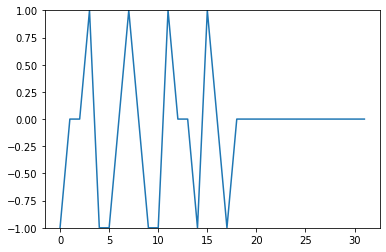

poids_calcules pour AND :  [ 2.  1. -3.]
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1
Erreurs =  [-1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


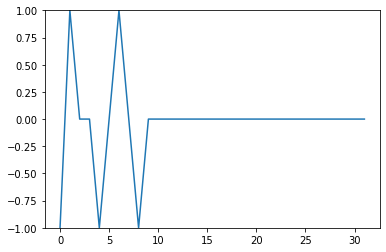

poids_calcules pour OR :  [ 1.  1. -1.]
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


In [2]:
from random import choice
import numpy as np
# Le jeux de données avec le résultat attentu pour un OR
# [entrée1, entrée2, biais d'activation], résultat attendu
donnees_entrainement_OR = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

# Le jeux de données avec le résultat attentu pour un AND
donnees_entrainement_AND = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

# Fonction de pré-activation
# Elle prend en entrée la valeur des poids
# Et les valeurs d''entrée des neurones (les entrée + le biais)
def pre_activation(poids, valeurs_entrees):
    # On réalise le produit scalaire (dot product)
    produit_scalaire = poids.T.dot(valeurs_entrees)
    return produit_scalaire


# Fonction d'activation
def fonction_d_activation(produit_scalaire):
    # On retourne 1 si le produit_scalaire est supérieur ou égal à 0, 0 sinon
    return 1 if produit_scalaire >= 0 else 0

# La prédiction consiste à prévoir la valeur attendue en sortie en fontion
# des valeurs d'entrée et des poids
def faire_une_prediction(poids, valeurs_entrees):
    produit_scalaire = pre_activation(poids, valeurs_entrees)
    prediction = fonction_d_activation(produit_scalaire)
    return prediction

def entrainement_du_model(donnees_entrainement, nombre_epoch=10, taux_apprentissage = 1):
    # Epoch : une epoch est un apprentissage sur le jeux de données complet.
    #   Il en faut plusieurs pour arriver à apprendre correctement
    # Une itération est le passage sur une donnée, il y a donc plusieurs itération par Epoch.
    # Initialisation des 3 valeurs de poids (entrée1, entrée2 et biais)
    poids = np.zeros(3)
    # Initialisation d'un tableau pour stocker l'historique des erreurs
    historique_des_erreurs = []
    # On fixe le nombre d'itération
    #  Avec un gros jeux de données on piocherait aléatoirement
    #  des valeurs. Ici on prend tous le jeux de odonnées à chaque fois.
    nombre_iteration = len(donnees_entrainement)
    for epoch in range(nombre_epoch):
        for i in range(nombre_iteration):
            # On récupére les données d'entrées et le résultat attendue
            # dans le jeux de données d'entrainement
            valeurs_entrees, resultat_attendu = donnees_entrainement[i]
            # On réalise une prédiction :
            #   c'est à dire estimer la valeur attendue en fonction des valeurs d'entrée du neurone
            prediction = faire_une_prediction(poids, valeurs_entrees)
            # On soustrait la valeur prédite à la valeur attendue
            # Ce qui nous donne l'erreur, elle est égale à 0 si la prédiction était bonne
            # Si elle est toujours à 0 c'est que l'apprentissage est terminé (pas fait automatiquement ici)
            erreur = resultat_attendu - prediction
            # On ajoute cette erreur à l'historique des erreurs
            historique_des_erreurs.append(erreur)
            # Cette erreur est multipliée par le taux d'aprentissage et les valeurs d'entrées,
            # pour estimer les poids pour la prochaine itération.
            poids = poids + taux_apprentissage * erreur * valeurs_entrees
            #print("input=", valeurs_entrees, "produit_scalaire=", produit_scalaire, " poids=",poids," resultat_attendu=", resultat_attendu, " fonction_d_activation(produit_scalaire)=", fonction_d_activation(produit_scalaire), " erreur=", erreur)
    print("Erreurs = ", historique_des_erreurs)
    # On affiche le graph de l'évolution de l'erreur
    from pylab import plot, ylim, show
    ylim([-1,1])
    plot(historique_des_erreurs)
    show()
    return poids

def utilisation_du_model(poids, donnees):
    # Utilisation des poids issue de l'entrainement sur les différentes valeurs
    for valeurs_entrees, _ in donnees: # "_" sert à ignorée la dernière colonne du tableau qui contient le résultat attendu.
     prediction = faire_une_prediction(poids, valeurs_entrees)
     print("{} -> {}".format(valeurs_entrees[:2], prediction))

# Choix du jeu de données AND
donnees_entrainement = donnees_entrainement_AND
# Le modèl est la structure du réseau de neurones, ici il n'y a qu'un neurone.
# L'entrainement consiste à calculer/déterminer les poids en fonction du résultat attendu. Cette étape s'appel "train" ou "fit" en anglais

poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour AND : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)
# Entrainement sur le jeux de donnée OR
donnees_entrainement = donnees_entrainement_OR
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour OR : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)